# Lab Course Machine Learning
# Exercise Sheet 6
December 15th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 0: Dataset Preprocessing

In [459]:
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit

In [460]:
mu, sigma = 1, 0.05 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(100, 1))


In [461]:
mu, sigma = 1, 0.1 # mean and standard deviation
r = np.random.normal(mu, sigma, size=(100, 1))


In [462]:
Y=1.3*(X**2) + (4.8*X) +8+r


### (b)Wine Quality called D2:

In [9]:
wq = pd.read_csv('winequality-red.csv',sep = ';')

In [10]:
wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
is_NaN = wq.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = wq[row_has_NaN]
rows_with_NaN

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [12]:
dsy = wq.loc[:, wq.columns != 'quality']
wqf = (dsy-dsy.mean())/dsy.std()
wqf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [13]:
wqf['quality'] = wq[['quality']]
wqf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,5
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,5
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,6
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,5
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,6
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,6
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,5


### Exercise 1: Generalized Linear Models with Scikit Learn

### Split your data into Train and Test Splits according to the 80%:20% ratio.

In [51]:
wqf_train = wqf.loc[0:math.floor(len(wqf)*0.8)]
wqf_test = wqf.loc[math.floor(len(wqf)*0.8)+1:]
len(wqf) == len(wqf_train)+ len(wqf_test)
wqf_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1280,-0.700500,-0.378759,-0.364349,-0.453077,-0.222383,1.159168,0.228975,-0.607566,0.381425,-0.107068,-0.021567,6
1281,-0.700500,-0.378759,-0.364349,-0.453077,-0.222383,1.159168,0.228975,-0.607566,0.381425,-0.107068,-0.021567,6
1282,-0.241019,1.324583,-1.391037,-0.382151,-0.073654,-0.657248,-0.743808,-0.294955,0.122335,0.128910,0.447623,6
1283,0.218462,0.570645,0.046326,0.114328,0.181311,0.107558,0.684967,0.314370,-0.331073,-0.166063,-0.209243,6
1284,-0.757935,-0.602148,-0.415683,-0.169374,-0.349866,0.203159,-0.318215,-1.052638,0.510970,-0.579025,0.447623,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,5
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,6
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,6
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,5


### For each model, pick three sets of hyperparameters and learn each model

In [479]:
X_train = wqf_train.loc[:, wqf_train.columns != 'quality'].to_numpy()
Y_train = wqf_train[['quality']].to_numpy()

X_test = (wqf_test.loc[:, wqf_train.columns != 'quality']).to_numpy()
Y_test = (wqf_test[['quality']]).to_numpy()


In [480]:
n= 3
lamdaList =np.random.uniform(np.exp(-9),np.exp(-4),n) 

numberofIterations = [250,500,1000]
hyperParamConfigs = []
for i in range (n):
    hyperParamConfigs.append([numberofIterations[i],lamdaList[i]])

In [481]:
hyperParamConfigs

[[250, 0.01304223276289804],
 [500, 0.010112096600584174],
 [1000, 0.017106943712182084]]

In [482]:
RMSE = []
for n,lamda in (hyperParamConfigs):
    # for ordinary least square alpha is 0
    ordinaryReg = SGDRegressor(alpha = 0,max_iter=n)
    ordinaryReg.fit(X_train,Y_train)
    pred_train_ordinaryReg= ordinaryReg.predict(X_train) #prediction
    rmseTrain_ordinaryReg = np.sqrt(mean_squared_error(Y_train,pred_train_ordinaryReg)) #RMSE

    pred_test_ordinaryReg= ordinaryReg.predict(X_test)
    rmseTest_ordinaryReg = np.sqrt(mean_squared_error(Y_test,pred_test_ordinaryReg))
    
    ridgeReg = SGDRegressor(alpha =lamda,max_iter=n,penalty='l2')
    ridgeReg.fit(X_train,Y_train)
    pred_train_ridgeReg= ridgeReg.predict(X_train)
    rmseTrain_ridgeReg = np.sqrt(mean_squared_error(Y_train,pred_train_ridgeReg))

    pred_test_ridgeReg= ridgeReg.predict(X_test)
    rmseTest_ridgeReg = np.sqrt(mean_squared_error(Y_test,pred_test_ridgeReg))
    
    lassoReg = SGDRegressor(alpha =lamda,max_iter=n,penalty='l1')
    lassoReg.fit(X_train,Y_train)
    pred_train_lassoReg= lassoReg.predict(X_train)
    rmseTrain_lassoReg = np.sqrt(mean_squared_error(Y_train,pred_train_lassoReg))

    pred_test_lassoReg= lassoReg.predict(X_test)
    rmseTest_lassoReg = np.sqrt(mean_squared_error(Y_test,pred_test_lassoReg))
    
    RMSE.append([n,lamda,rmseTrain_ordinaryReg,rmseTest_ordinaryReg,rmseTrain_ridgeReg,rmseTest_ridgeReg,rmseTrain_lassoReg,rmseTest_lassoReg])
    
    


In [483]:
Rmse = np.array(RMSE)

In [484]:
np.array(hyperParamConfigs)[:,1]

array([0.01304223, 0.0101121 , 0.01710694])

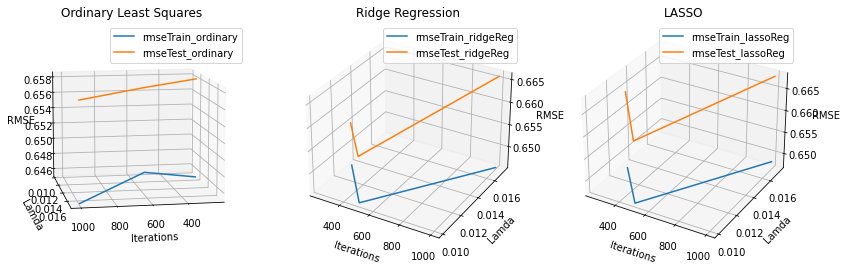

In [508]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.view_init(elev=10., azim=80.)
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,2],label='rmseTrain_ordinary')
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,3],label='rmseTest_ordinary')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('RMSE')

ax.set_title("Ordinary Least Squares")
ax.legend()
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,4],label='rmseTrain_ridgeReg')
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,5],label='rmseTest_ridgeReg')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('RMSE')
ax.set_title('Ridge Regression')
ax.legend()
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,6],label='rmseTrain_lassoReg')
ax.plot(Rmse[:,0], Rmse[:,1], Rmse[:,7],label='rmseTest_lassoReg')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('RMSE')
ax.set_title('LASSO')
ax.legend()
plt.show()

As it is clear from graph that train error is less than test error

### 3. Now tune the hyperparameters using scikit learn GridSearchCV

In [635]:
def get_best_params(train_x, train_y,alphaRange,iterationRange,penatly):
    param_grid = dict(alpha=alphaRange, max_iter=iterationRange)

    cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42) # stratifying sample for crossvalidation as test size 20% and divinding it into two parts
    # for param grid calling GridSearchCV with penalty(for specifying model) and diff hyper params in grid
    grid = GridSearchCV(SGDRegressor(penalty=penatly), param_grid=param_grid, cv=cv,return_train_score=True, n_jobs=14, verbose=10) 
    grid.fit(train_x, train_y)

    print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

    scores = []
    # to calculate test and train score for each setting in parameter and adding it to scores list
    for i,j,k in zip (grid.cv_results_['params'],grid.cv_results_['mean_test_score'],grid.cv_results_['mean_train_score']):
        scores.append([j,k,i['alpha'],i['max_iter']])
    no_iteration_best = grid.best_params_['max_iter']
    alpha_best = grid.best_params_['alpha']

    sgd = SGDRegressor(alpha =alpha_best,max_iter=no_iteration_best,penalty=penatly)

    return sgd,np.array(scores),no_iteration_best,alpha_best

In [638]:
X_train = wqf_train.loc[:, wqf_train.columns != 'quality'].to_numpy()
Y_train = wqf_train[['quality']].to_numpy()

X_test = (wqf_test.loc[:, wqf_train.columns != 'quality']).to_numpy()
Y_test = (wqf_test[['quality']]).to_numpy()

### Ordinary Least Squares

Fitting 2 folds for each of 4 candidates, totalling 8 fits
The best parameters are {'alpha': 0, 'max_iter': 1000} with a score of 0.35


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=14)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done   8 out of   8 | elapsed:    0.0s finished


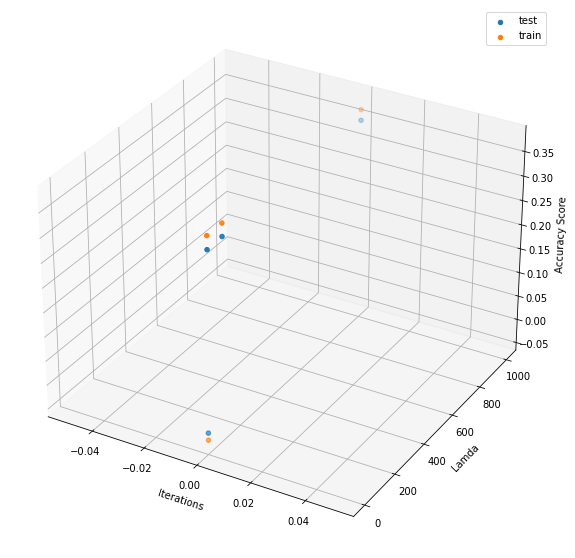

In [639]:
iterationRange = [1, 10, 100, 1000]
alphaRange =[0]
orginarySGD,scores,no_iteration_best_ord,alpha_best_ord = get_best_params(X_train, Y_train,alphaRange,iterationRange,'l1')
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(scores[:,2], scores[:,3], scores[:,0],label='test')
ax.scatter(scores[:,2], scores[:,3], scores[:,1],label='train')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('Accuracy Score')
ax.legend()
plt.show()

Train accuracy is higher than test accuary for each combination of hyperparamters.

### Ridge Regression

Fitting 2 folds for each of 20 candidates, totalling 40 fits
The best parameters are {'alpha': 0.0005878382651812713, 'max_iter': 1000} with a score of 0.35


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  18 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  23 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  28 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  33 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  40 out of  40 | elapsed:    0.0s finished


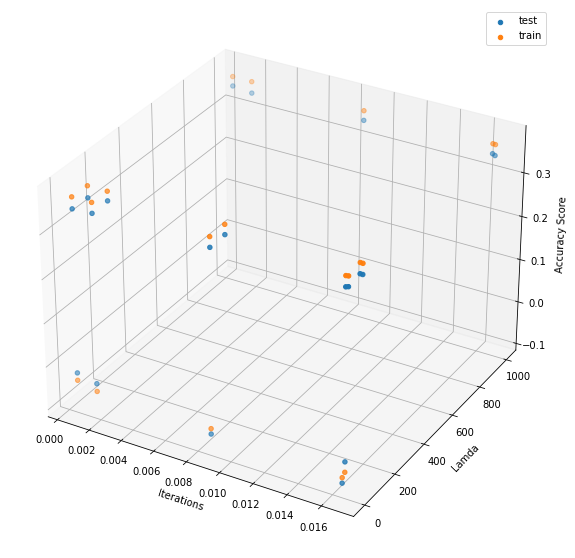

In [640]:
n= 5
iterationRange = [1, 10, 100, 1000]
alphaRange = np.random.uniform(np.exp(-9),np.exp(-4),n) 
ridgeSGD,scores,no_iteration_best_rig,alpha_best_rig = get_best_params(X_train, Y_train,alphaRange,iterationRange,'l2')
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(scores[:,2], scores[:,3], scores[:,0],label='test')
ax.scatter(scores[:,2], scores[:,3], scores[:,1],label='train')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('Accuracy Score')
ax.legend()
plt.show()

### LASSO

Train accuracy is higher than test accuary for each combination of hyperparamters.

Fitting 2 folds for each of 20 candidates, totalling 40 fits
The best parameters are {'alpha': 0.0037581469970294854, 'max_iter': 1000} with a score of 0.35


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Batch computation too fast (0.0110s.) Setting batch_size=2.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  18 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  23 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  28 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  33 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  40 out of  40 | elapsed:    0.0s finished


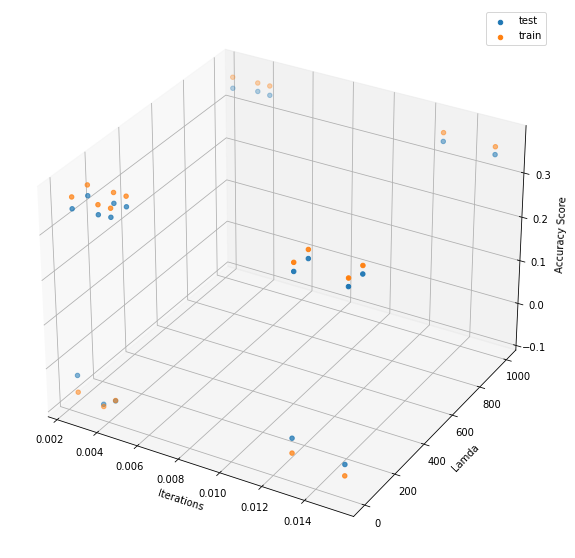

In [641]:
n= 5
iterationRange = [1, 10, 100, 1000]
alphaRange = np.random.uniform(np.exp(-9),np.exp(-4),n) 
lassoSGD,scores,no_iteration_best_las,alpha_best_las = get_best_params(X_train, Y_train,alphaRange,iterationRange,'l1')
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(scores[:,2], scores[:,3], scores[:,0],label='test')
ax.scatter(scores[:,2], scores[:,3], scores[:,1],label='train')
ax.set_xlabel('Iterations')
ax.set_ylabel('Lamda')
ax.set_zlabel('Accuracy Score')
ax.legend()
plt.show()

Train accuracy is higher than test accuary for each combination of hyperparamters.

### Using the optimal hyperparameter you have to evaluate each model on the Test Set.

In [647]:
RMSE = []
ordinaryReg = SGDRegressor(alpha = alpha_best_ord,max_iter=no_iteration_best_ord)
ordinaryReg.fit(X_train,Y_train)
pred_train_ordinaryReg= ordinaryReg.predict(X_train)
rmseTrain_ordinaryReg = np.sqrt(mean_squared_error(Y_train,pred_train_ordinaryReg))

pred_test_ordinaryReg= ordinaryReg.predict(X_test)
rmseTest_ordinaryReg = np.sqrt(mean_squared_error(Y_test,pred_test_ordinaryReg))

ridgeReg = SGDRegressor(alpha =alpha_best_rig,max_iter=no_iteration_best_rig,penalty='l2')
ridgeReg.fit(X_train,Y_train)
pred_train_ridgeReg= ridgeReg.predict(X_train)
rmseTrain_ridgeReg = np.sqrt(mean_squared_error(Y_train,pred_train_ridgeReg))

pred_test_ridgeReg= ridgeReg.predict(X_test)
rmseTest_ridgeReg = np.sqrt(mean_squared_error(Y_test,pred_test_ridgeReg))

lassoReg = SGDRegressor(alpha =alpha_best_las,max_iter=no_iteration_best_las,penalty='l1')
lassoReg.fit(X_train,Y_train)
pred_train_lassoReg= lassoReg.predict(X_train)
rmseTrain_lassoReg = np.sqrt(mean_squared_error(Y_train,pred_train_lassoReg))

pred_test_lassoReg= lassoReg.predict(X_test)
rmseTest_lassoReg = np.sqrt(mean_squared_error(Y_test,pred_test_lassoReg))
RMSE.append([n,lamda,rmseTrain_ordinaryReg,rmseTest_ordinaryReg,rmseTrain_ridgeReg,rmseTest_ridgeReg,rmseTrain_lassoReg,rmseTest_lassoReg])




In [644]:
print('Ordinary Least Squares: Train Rmse:',rmseTrain_ordinaryReg,',Test Rmse:',rmseTest_ordinaryReg,', Alpha Best:',alpha_best_ord,', Best No of iterations:',no_iteration_best_ord )

Ordinary Least Squares: Train Rmse: 0.6451959565143569 ,Test Rmse: 0.6591434487027781 , Alpha Best: 0 , Best No of iterations: 1000


In [645]:
print('Ridge Regression :',rmseTrain_ridgeReg,',Test Rmse:',rmseTest_ridgeReg,', Alpha Best:',alpha_best_rig,', Best No of iterations:',no_iteration_best_rig )

Ridge Regression : 0.6455985682230949 ,Test Rmse: 0.6576323366994828 , Alpha Best: 0.0005878382651812713 , Best No of iterations: 1000


In [646]:
print('LASSO :',rmseTrain_lassoReg,',Test Rmse:',rmseTest_lassoReg,', Alpha Best:',alpha_best_las,', Best No of iterations:',no_iteration_best_las )

LASSO : 0.6451102978427398 ,Test Rmse: 0.6576034561282299 , Alpha Best: 0.0037581469970294854 , Best No of iterations: 1000


## Exercise 2: Higher Order Polynomial Regression

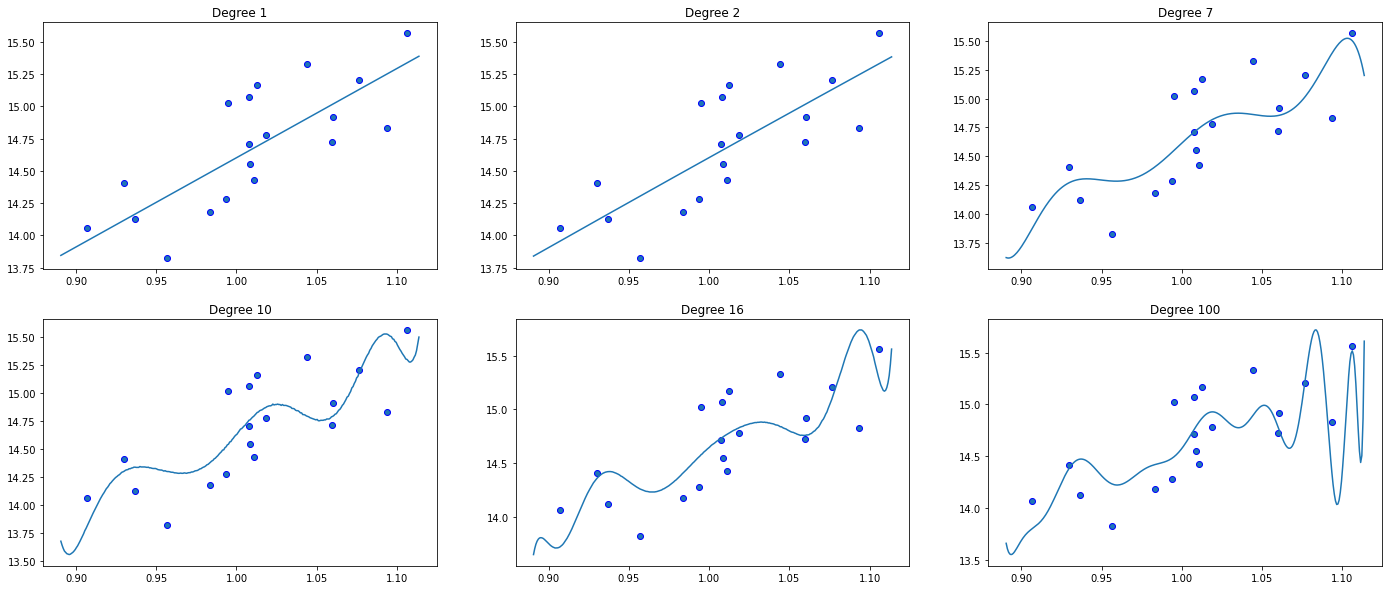

In [648]:
np.random.seed(3116)
mu, sigma = 1, 0.05 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(100, 1))
mu, sigma = 1, 0.1 # mean and standard deviation
r = np.random.rand(100,1)
Y=1.3*(X**2) + (4.8*X) +8+r
degrees = [1,2,7, 10, 16 , 100]
plt.figure(figsize=(24, 10))
for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    #transforming X into polynommial
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

    X_train =X[0:math.floor(len(X)*0.8),:]
    X_test =X[math.floor(len(X)*0.8)+1:,:]

    y_train = Y[0:math.floor(len(Y)*0.8),:]
    y_test =Y[math.floor(len(Y)*0.8)+1:,:]
    pipeline.fit(X_train, y_train)
    regr = linear_model.LinearRegression()
    regr.fit(X_fit_train, y_train)
    y_pred_test = pipeline.predict(X_test)


    plt.plot(X_seq,pipeline.predict(X_seq), label="Model")
    plt.scatter(X_test, y_test, edgecolor="b", label="Samples")
    plt.title(
        "Degree {}".format(
            degrees[i]
        )
    )
plt.show()

If we keep increasing the degree it will start overfitting the model, Best values are degree is determined by rmse for test dataset.

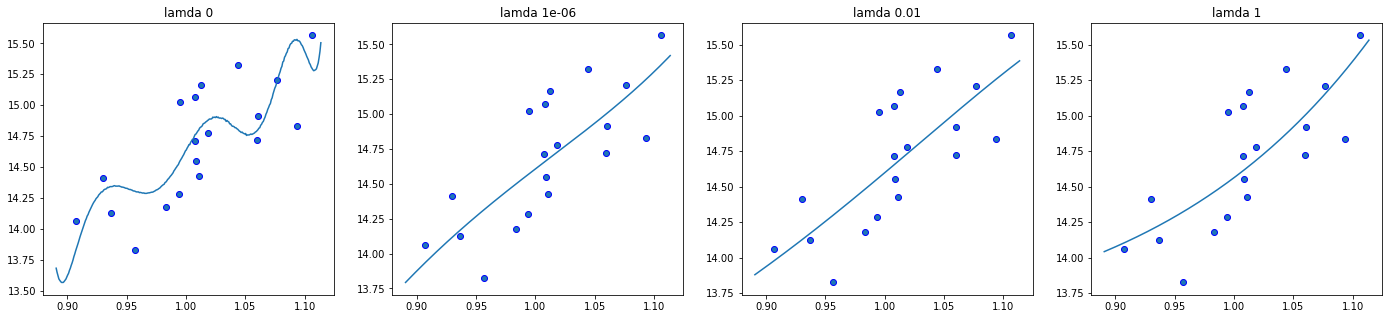

In [649]:
lamda = [0,10**(-6),10**(-2),1]
plt.figure(figsize=(24, 5))
for i in range(len(lamda)):
    ax = plt.subplot(1, len(lamda), i + 1)
    polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
    linear_regression = Ridge(alpha=lamda[i])
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

    X_train =X[0:math.floor(len(X)*0.8),:]
    X_test =X[math.floor(len(X)*0.8)+1:,:]

    y_train = Y[0:math.floor(len(Y)*0.8),:]
    y_test =Y[math.floor(len(Y)*0.8)+1:,:]
    pipeline.fit(X_train, y_train)
    regr = linear_model.LinearRegression()
    regr.fit(X_fit_train, y_train)
    y_pred_test = pipeline.predict(X_test)


    plt.plot(X_seq,pipeline.predict(X_seq), label="Model")
    plt.scatter(X_test, y_test, edgecolor="b", label="Samples")
    plt.title(
        "lamda {}".format(
            lamda[i]
        )
    )
plt.show()

If we penalize the model by giving higher lamda, it will start underfit the model and if we give very lower lamda than it will overfit the model.So to create a balance we have to give moderate values for lamda.

## Exercise 3: Implementing Coordinate Descent

In [686]:
def loss(X,Y,B):
    sum = 0
    for i in range (len(X)):    
        sum  = sum +((Y[i].T-np.dot(X[i],B)) ** 2)
    return sum
def cordinateDecent(X,Y,B,imax):
    f = loss(X,Y,B)

    BList = []
    for i in range (imax):
        BList.append(list(B))
    
        for m in range (len(B)):
            X_minus_m = np.delete(X, m, axis=1)
            B_minus_m = np.delete(B, m, axis=0).reshape(-1,1)
            g = np.dot(np.subtract(Y,np.dot(X_minus_m,B_minus_m)).T,X[:,m])/np.dot(X[:,m].T,X[:,m])
            B[m] = g
        
        
    return np.array(BList)
        



In [700]:
X_train = wqf_train.loc[:, wqf_train.columns != 'quality']
Y_train = wqf_train[['quality']]
X_test = (wqf_test.loc[:, wqf_test.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))

X_test = np.append(bias_column,X_test,axis=1)
Y_test = (wqf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
bList = cordinateDecent(X,Y,B,100)


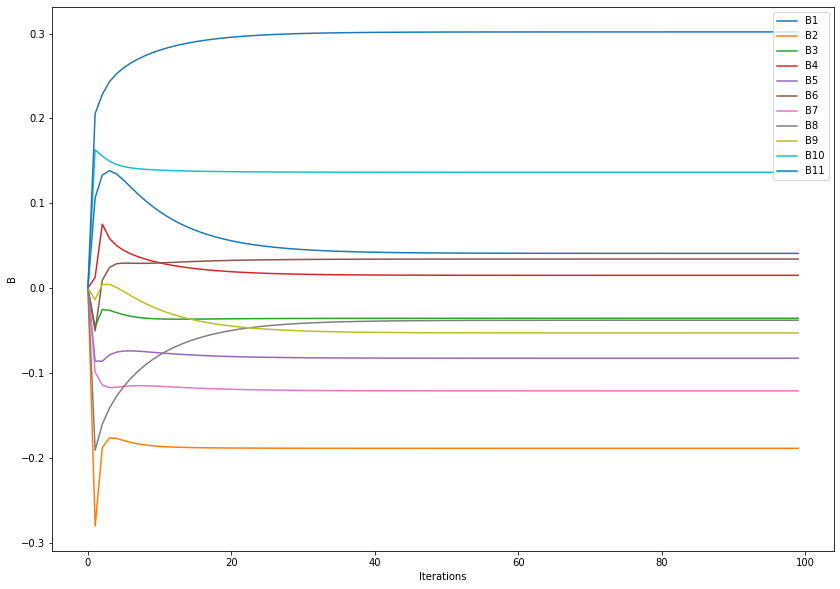

In [701]:

fig = plt.figure(figsize=(14,10))
ax = plt.axes()


for i in range(1,len(B)):
    ax.plot(bList[:,i],label='B'+str(i))

ax.set_xlabel('Iterations')
ax.set_ylabel('B')
ax.legend()
plt.show()

After approximately 30 iterations values of paramters do no change.

In [702]:
def cordinateDecentLI(X,Y,B,imax,lamda):
    f = loss(X,Y,B)

    BList = []
    for i in range (imax):
        BList.append(list(B))
        for m in range (len(B)):
            X_minus_m = np.delete(X, m, axis=1)
            B_minus_m = np.delete(B, m, axis=0).reshape(-1,1)
            e = (0.5*lamda)/np.dot(X[:,m].T,X[:,m])
            g = np.dot((Y-np.dot(X_minus_m,B_minus_m)).T,X[:,m])/np.dot(X[:,m].T,X[:,m])
            
            if(g>e):
                B[m] = g-e
            elif(abs(g)<=e):
                B[m] = 0
            elif(g<-e):
                B[m] = g+e
                                
    return np.array(BList)

In [703]:
B = np.zeros(len(X[0]))
bList = cordinateDecentLI(X,Y,B,100,5)
bList

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.66289063e+00,  1.04866299e-01, -2.79133368e-01, ...,
        -1.04023378e-02,  1.60508117e-01,  2.04881699e-01],
       [ 5.65951307e+00,  1.31018790e-01, -1.86496158e-01, ...,
         4.86667965e-03,  1.51496515e-01,  2.28524425e-01],
       ...,
       [ 5.65806269e+00,  2.45998920e-02, -1.86363721e-01, ...,
        -5.45829717e-02,  1.32472280e-01,  3.07277691e-01],
       [ 5.65806269e+00,  2.45997266e-02, -1.86363725e-01, ...,
        -5.45830628e-02,  1.32472272e-01,  3.07277761e-01],
       [ 5.65806270e+00,  2.45995800e-02, -1.86363729e-01, ...,
        -5.45831435e-02,  1.32472266e-01,  3.07277823e-01]])

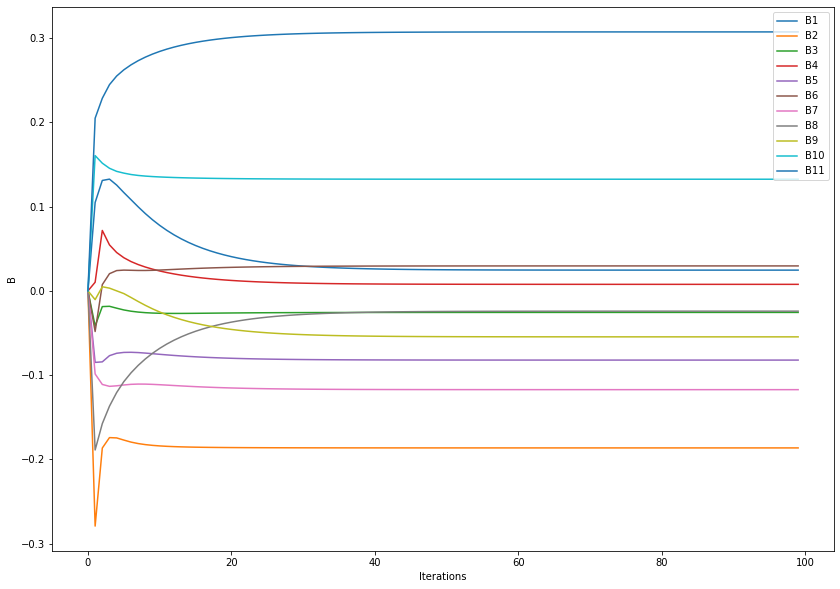

In [704]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes()


for i in range(1,len(B)):
    ax.plot(bList[:,i],label='B'+str(i))

ax.set_xlabel('Iterations')
ax.set_ylabel('B')
ax.legend()
plt.show()

After adding the regularization term, values of params becomes constant quickly and comes closer to zero.